In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.columns.unique()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.rename(columns={'Geography\t': 'Geography'}, inplace=True)
df.columns = df.columns.str.strip()
df.head(10)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

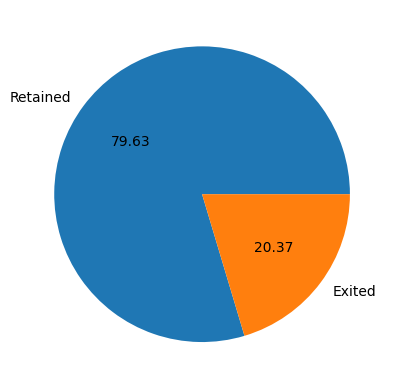

In [8]:
plt.pie(df['Exited'].value_counts(), labels=['Retained','Exited'],autopct="%0.2f")
plt.show()

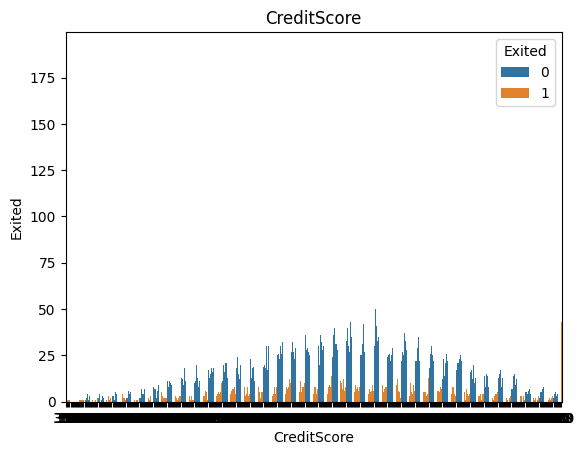

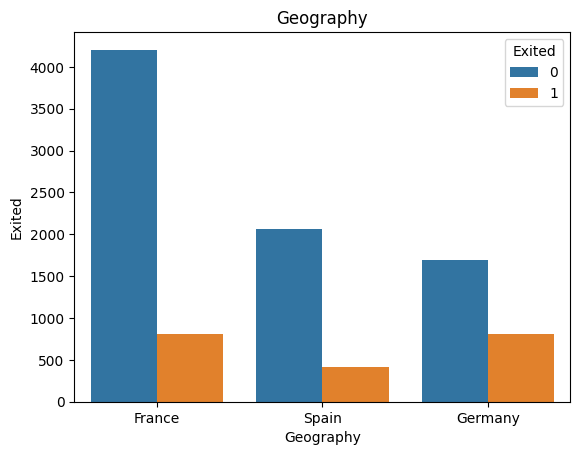

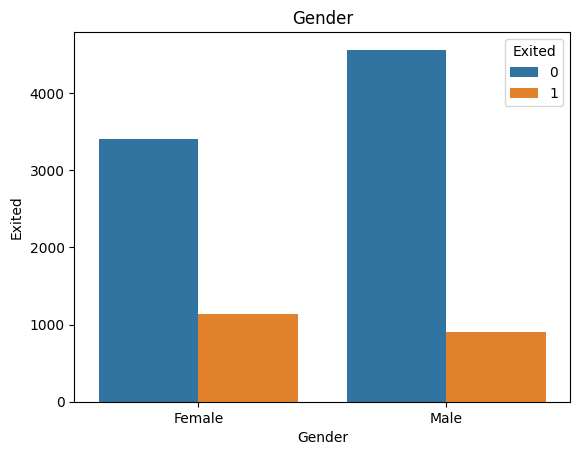

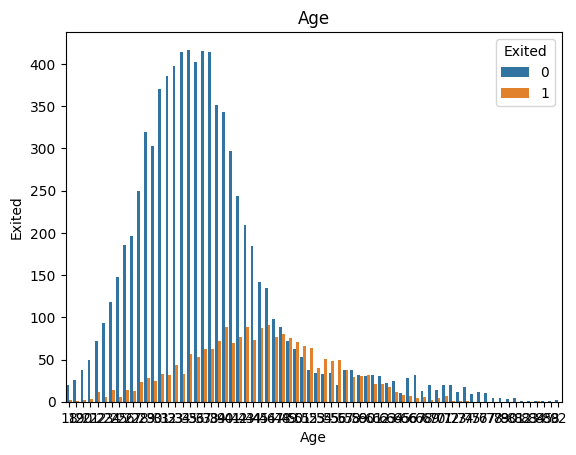

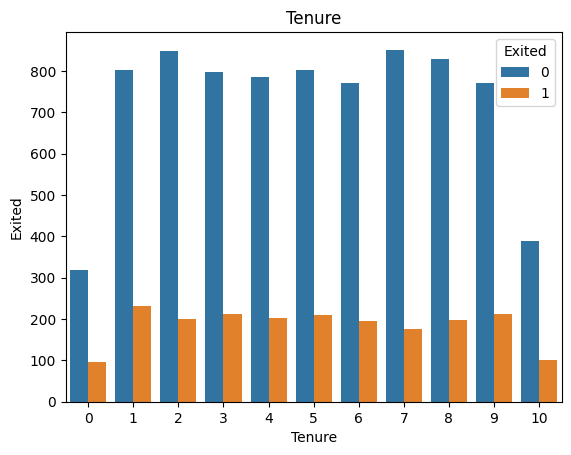

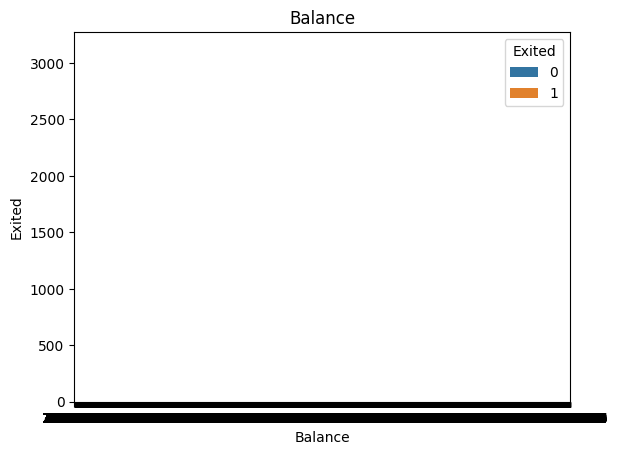

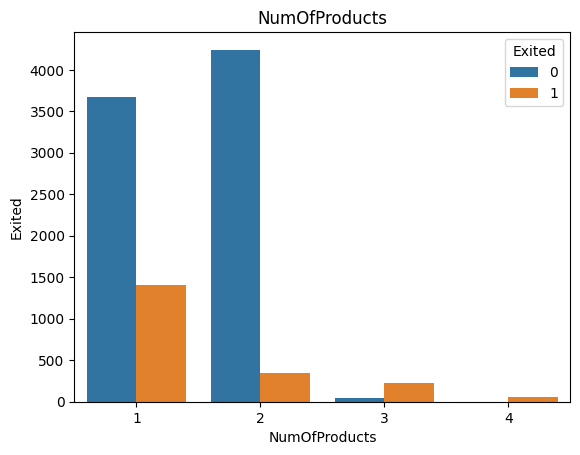

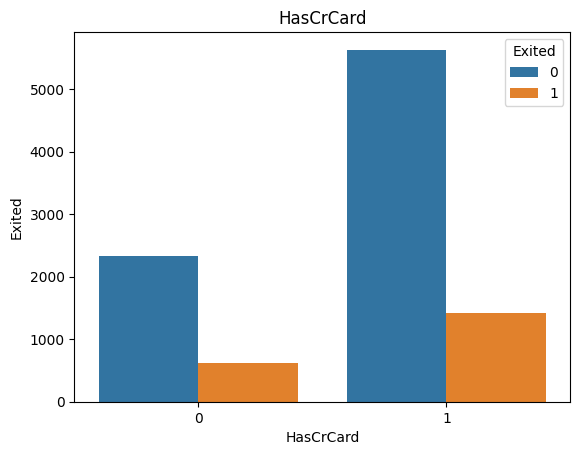

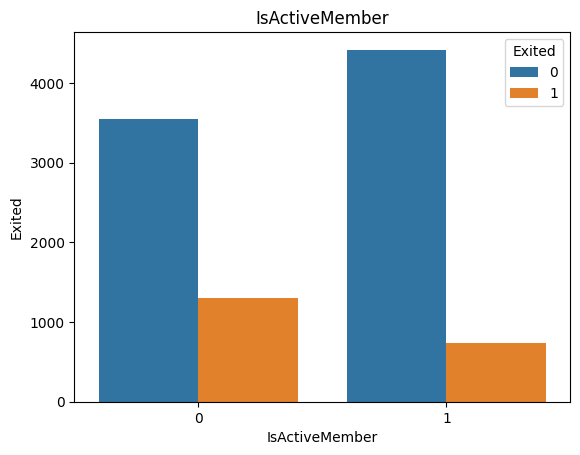

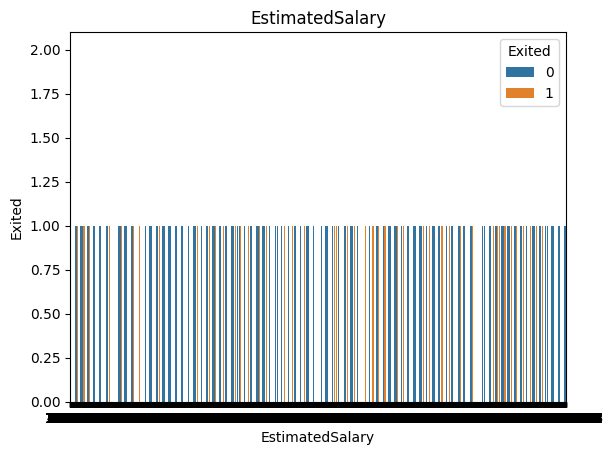

In [9]:

target = df.drop(columns='Exited')

for feature in target:
    data = df.copy()

    sns.countplot(x=feature, hue='Exited',data=df)
    plt.xlabel(feature)
    plt.ylabel('Exited')
    plt.title(feature)
    plt.show()



In [11]:
df['Balance_Salary_Ratio'] = df.Balance/df.EstimatedSalary
df['Credit_Score_Given_Age'] = df.CreditScore/(df.Age)
df['Tenure_By_Age'] = df.Tenure/(df.Age)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_Salary_Ratio,Credit_Score_Given_Age,Tenure_By_Age
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,14.738095,0.047619
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,14.829268,0.024390
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,11.952381,0.190476
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,17.923077,0.025641
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,19.767442,0.046512
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0.759604,14.659091,0.181818
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0.000000,16.440000,0.140000
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.963969,12.965517,0.137931
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1.895518,11.386364,0.090909
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1.876647,25.333333,0.074074


In [12]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'Balance_Salary_Ratio',
                   'Tenure_By_Age','Credit_Score_Given_Age']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df=df[['Exited'] + continuous_vars + cat_vars]

In [13]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df= pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head(10)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Balance_Salary_Ratio,Tenure_By_Age,Credit_Score_Given_Age,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,False,False,False
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,False,True,False
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,False,False,False
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,False,False,False
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,False,True,False
5,1,645,44,8,113755.78,2,149756.71,0.759604,0.181818,14.659091,1,0,False,True,True
6,0,822,50,7,0.00,2,10062.80,0.000000,0.140000,16.440000,1,1,False,False,True
7,1,376,29,4,115046.74,4,119346.88,0.963969,0.137931,12.965517,1,0,True,False,False
8,0,501,44,4,142051.07,2,74940.50,1.895518,0.090909,11.386364,0,1,False,False,True
9,0,684,27,2,134603.88,1,71725.73,1.876647,0.074074,25.333333,1,1,False,False,True


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[continuous_vars]=scaler.fit_transform(df[continuous_vars])
df.head(10)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Balance_Salary_Ratio,Tenure_By_Age,Credit_Score_Given_Age,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,False,False,False
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,0,1,False,True,False
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,0,False,False,False
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,0,0,False,False,False
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,False,True,False
5,1,0.590,0.351351,0.8,0.453394,0.333333,0.748797,0.000072,0.327273,0.233203,1,0,False,True,True
6,0,0.944,0.432432,0.7,0.000000,0.333333,0.050261,0.000000,0.252000,0.275574,1,1,False,False,True
7,1,0.052,0.148649,0.4,0.458540,1.000000,0.596733,0.000091,0.248276,0.192911,1,0,True,False,False
8,0,0.302,0.351351,0.4,0.566170,0.333333,0.374680,0.000179,0.163636,0.155340,0,1,False,False,True
9,0,0.668,0.121622,0.2,0.536488,0.000000,0.358605,0.000177,0.133333,0.487160,1,1,False,False,True


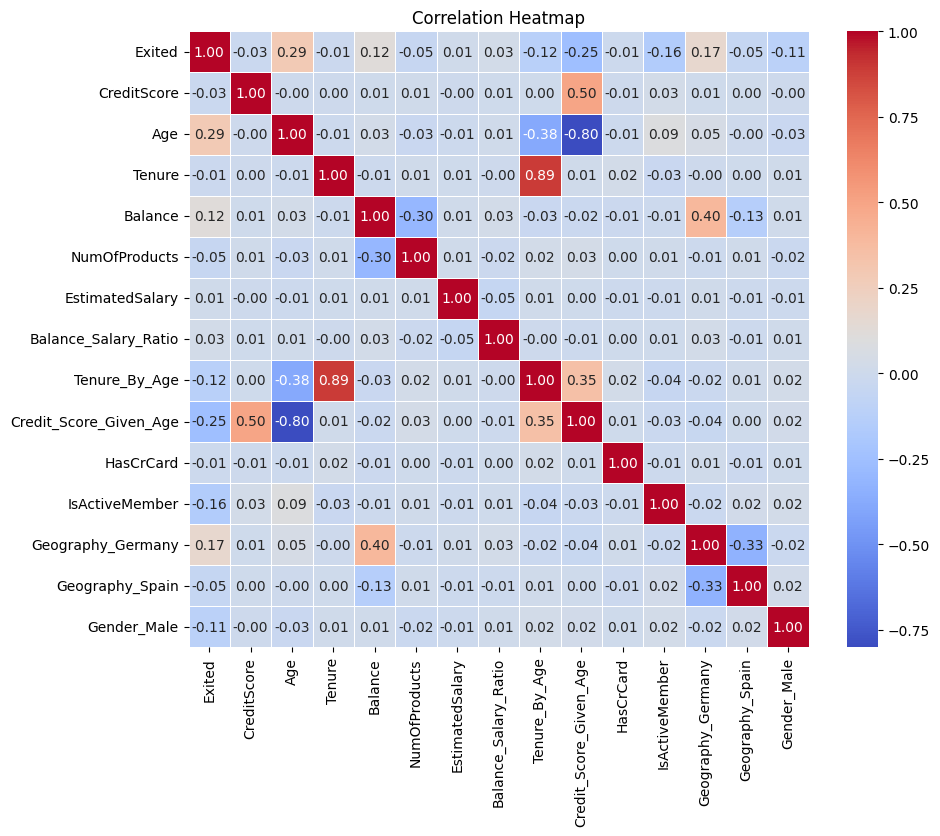

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [18]:
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, y)
X_res.shape
y_res.shape

(15654,)

In [19]:
y_res.shape

(15654,)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
lr=LogisticRegression()
rdf= RandomForestClassifier()
gbf=GradientBoostingClassifier()

In [23]:
clfs={
    'logistic Regression':lr,
    'random forest ':rdf,
    'gradient boosting':gbf
}

In [24]:
def train(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [25]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

accuracy_scores = []
precision_scores = []
f1_scores = []

def train(clf, X_train, y_train, X_test, y_test, name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("For ", name)
    print("Accuracy - ", accuracy)
    print("Precision - ", precision)
    print("F1_score - ", f1)
    print(classification_report)
    return accuracy, precision, f1, report
for name, clf in clfs.items():
    current_accuracy, current_precision, f1, report = train(clf, X_train, y_train, X_test, y_test, name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(f1)



For  logistic Regression
Accuracy -  0.818
Precision -  0.5785123966942148
F1_score -  0.27777777777777773
<function classification_report at 0x0000012B6E053920>
For  random forest 
Accuracy -  0.8565
Precision -  0.7242990654205608
F1_score -  0.5192629815745393
<function classification_report at 0x0000012B6E053920>
For  gradient boosting
Accuracy -  0.862
Precision -  0.7465437788018433
F1_score -  0.5399999999999999
<function classification_report at 0x0000012B6E053920>


In [26]:
import pickle
pickle.dump(gbf,open('model.pkl','wb'))